In [5]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [9]:
data = pd.read_csv('/Users/Sathar/Documents/MD/DS/Trainings/Kaggle/twitter.csv')

In [10]:
data['Non-aggressive'] = data[['sadness','joy']].max(axis=1)
data['aggressive'] = data[['fear','disgust','anger']].max(axis=1)

In [11]:
data['sentiment_label']= data['sentiment_label'].replace('negative',0)
data['sentiment_label']= data['sentiment_label'].replace('neutral',1)
data['sentiment_label']= data['sentiment_label'].replace('positive',2)

In [12]:
data['bias']=np.where((data['sentiment_label']==0) | (data['aggressive']>0.5),1,0)

In [13]:
data['bias'].value_counts()

1    371
0    233
Name: bias, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y = data.bias.copy()
X = data.drop(['userId','text','bias'], axis=1) 

In [16]:
data.head()

,userId,text,sentiment_label,sadness,joy,fear,disgust,anger,Non-aggressive,aggressive,bias
0,1.175120e+18,RT @FrontNieuws: 22 South-African farm attacks...,0,0.537377,0.072224,0.291944,0.220625,0.164489,0.537377,0.291944,1
1,1.320800e+09,@realchrisrufo @TuckerCarlson The CRT and bull...,0,0.046627,0.024705,0.009720,0.239563,0.773850,0.046627,0.773850,1
2,7.968390e+17,RT @FrontNieuws: 22 South-African farm attacks...,0,0.537377,0.072224,0.291944,0.220625,0.164489,0.537377,0.291944,1
3,1.939637e+08,RT @ucet123: #blackracism #WhiteLivesMatter #A...,1,0.223239,0.360606,0.015595,0.527718,0.004490,0.360606,0.527718,1
4,1.192800e+18,#blackracism #WhiteLivesMatter #AllLivesMatter...,1,0.133241,0.212567,0.078511,0.081161,0.097968,0.212567,0.097968,0


In [17]:
X

,sentiment_label,sadness,joy,fear,disgust,anger,Non-aggressive,aggressive
0,0,0.537377,0.072224,0.291944,0.220625,0.164489,0.537377,0.291944
1,0,0.046627,0.024705,0.009720,0.239563,0.773850,0.046627,0.773850
2,0,0.537377,0.072224,0.291944,0.220625,0.164489,0.537377,0.291944
3,1,0.223239,0.360606,0.015595,0.527718,0.004490,0.360606,0.527718
4,1,0.133241,0.212567,0.078511,0.081161,0.097968,0.212567,0.097968
...,...,...,...,...,...,...,...,...
599,0,0.736374,0.014236,0.180164,0.248955,0.124123,0.736374,0.248955
600,0,0.021739,0.039420,0.050344,0.708669,0.430976,0.039420,0.708669
601,0,0.021739,0.039420,0.050344,0.708669,0.430976,0.039420,0.708669
602,0,0.021739,0.039420,0.050344,0.708669,0.430976,0.039420,0.708669


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
model = LogisticRegression(max_iter = 500000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy)

0.985


In [20]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(acc)

0.99


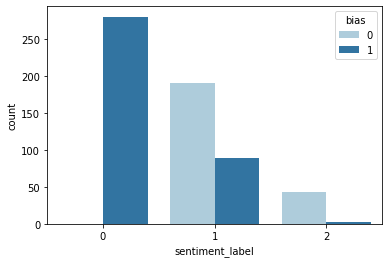

In [23]:
sn.countplot( x = data['sentiment_label'], hue = data['bias'] , palette = "Paired")